In [140]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [141]:
data = np.loadtxt("/tmp/adc_data.csv") * 1000000# reading in volts

print('n:{:>19d}'.format(len(data)))
print('median: {: .6e}'.format(np.median(data)))
print('mean:   {: .6e}'.format(np.mean(data)))
print('max:    {: .6e}'.format(np.max(data)))
print('min:    {: .6e}'.format(np.min(data)))
print('std:    {: .6e}'.format(np.std(data)))

n:               4897
median:  4.618288e+04
mean:    4.618259e+04
max:     4.625738e+04
min:     4.608393e+04
std:     2.458977e+01


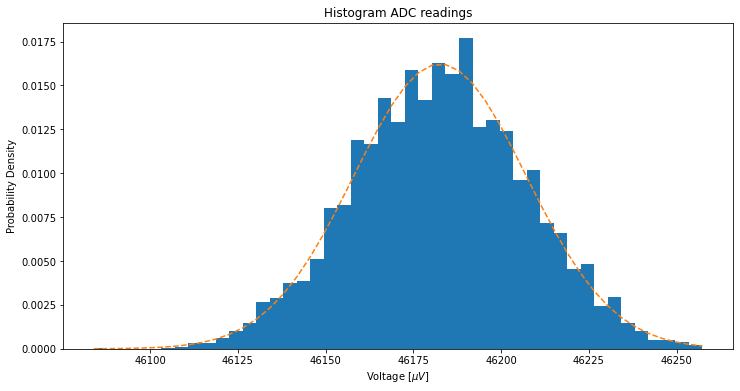

In [154]:
fig, axis = plt.subplots(figsize =(12, 6), facecolor=(1,1,1))

sigma = np.std(data)
mu = np.mean(data)

n, bins, patches = axis.hist(data, bins='fd', density=True)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
axis.plot(bins, y, '--')
axis.set_ylabel('Probability Density')
axis.set_xlabel('Voltage [$\mu V$]')
#axis.set_xlabel('Voltage [mV]')
#axis.set_xlabel('Voltage [V]')
axis.set_title(r'Histogram ADC readings')
#plt.grid()
plt.savefig('histogram.png', bbox_inches='tight')
plt.show()

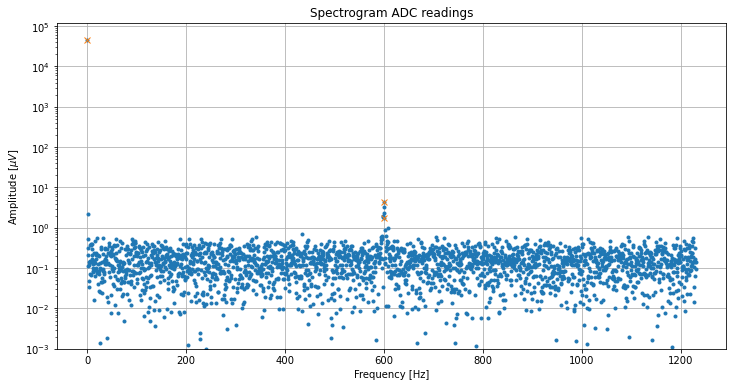

In [152]:
n = data.size
drate = 2463 # fill in the sample rate reported by the rpi_adc_stream command
timestep = 1./drate
freqbins = np.fft.rfftfreq(n, d=timestep)
fourier = np.fft.rfft(data, norm='forward')

peaks, _ = find_peaks(fourier.real, height=1.0)
peaks.resize(peaks.size+1)
peaks.sort()


fig, axis = plt.subplots(figsize =(12, 6), facecolor=(1,1,1))
#plt.plot(freqbins,20*np.log10(np.abs(fourier.real)), '.')
axis.semilogy(freqbins, np.abs(fourier.real), '.')
axis.semilogy(freqbins[peaks], np.abs(fourier.real[peaks]), 'x' )
axis.set_xlabel('Frequency [Hz]')
axis.set_ylabel('Amplitude [$\mu V$]')
axis.set_title(r'Spectrogram ADC readings')
plt.ylim(1e-3,)
#plt.xlim(1150,1250)
plt.grid()
plt.savefig('spectrogram.png', bbox_inches='tight') 
plt.show()

In [144]:
print(np.round(freqbins[peaks],1))
print(np.round(np.abs(fourier.real[peaks]),1))

[  0. 600. 601.]
[4.61826e+04 4.40000e+00 1.70000e+00]
